In [1]:
import numpy as np
import qutip as qutip
import time as time

from matplotlib import pyplot as plt

import sys
import os
sys.path.append('../../../utils')

from tomography import coherent_state_tomography as cst
from tomography import coherent_state_tomography_copy as cst2
from visualization import state_visualization as state_vis
from quantum_utils import quantum_optics_utils as qou

from mpl_toolkits.mplot3d.axes3d import Axes3D
from math_utils import statistics_utils as su

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
# Parameters - Make a small and coarse mesh initially because the outer product will make the state space huge
dim = 10
mesh_size = 0.5
max_x = 2

# Generate a single coherent state povm
povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
                                                          mesh_size, 
                                                          dim,
                                                          cutoff=0)

Generating coherent state mesh took 0.25476789474487305 s.


In [4]:
# Generate an entangled state on which to perform joint 2 photon MLE
state_0 = qutip.basis(dim, 0)
state_1 = qutip.basis(dim, 1)
input_state = (qutip.tensor(state_0, state_0) + qutip.tensor(state_1, state_1)).unit()
input_rho = input_state * input_state.dag()

histogram_4D = qou.generate_joint_2_photon_quadrature_histogram(input_rho, dim, povm)

In [5]:
thermal_reconstruction_dimension = 70# Test MLE for an entangled Bell state
number_of_mle_iterations = 500
s = time.time()
reconstructed_bell_state, bell_state_lls = \
    cst2.perform_coherent_state_MLE(
        povm,
        histogram_4D, 
        number_of_mle_iterations,
        frequency_threshold=0,
        cutoff=0,
        identity_mixin=0,
        number_of_photons=2)
e = time.time()
print('Time for MLE reconstruction for dim = ' + str(dim) + ': ' + str(e - s) + ' s')

Generating joint povm...
Generating joint povm mesh took 1.43583083152771 s.
Non-inlined, unflattened, untruncated coherent state MLE of 2 photon mode(s) and a Fock space  dimension of 10 took 2486.847731113434 seconds  for 500.
Time for MLE reconstruction for dim = 10: 2487.013947725296 s


In [6]:
print(qutip.fidelity(reconstructed_bell_state, input_rho))

0.992975114948367


<IPython.core.display.Javascript object>


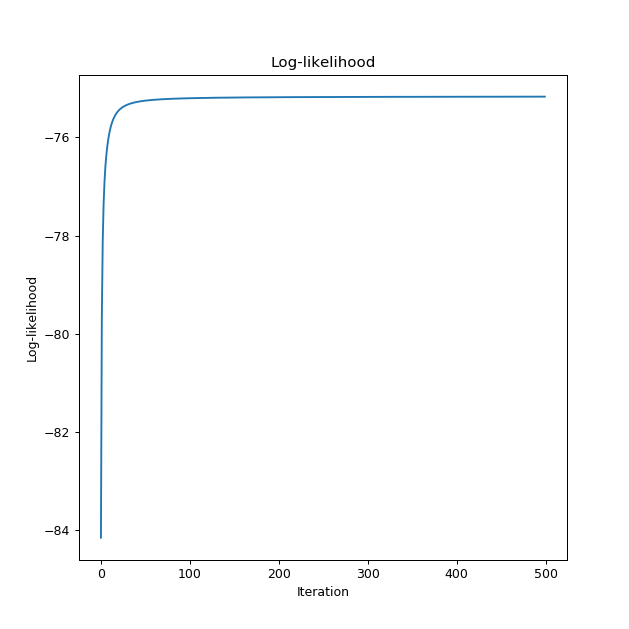

Reconstructed state fidelity:0.9929751140539729
Reconstruction time for 500 iterations: 3767.0654940605164


In [8]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(range(len(bell_state_lls)), bell_state_lls)
ax.set_title('Log-likelihood')
ax.set_xlabel('Iteration')
ax.set_ylabel('Log-likelihood')
print('Reconstructed state fidelity:' + str(qutip.fidelity(input_rho,
                                                           reconstructed_bell_state)))
print('Reconstruction time for ' + str(number_of_mle_iterations) + ' iterations: ' \
         + str(e - s))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


<IPython.core.display.Javascript object>


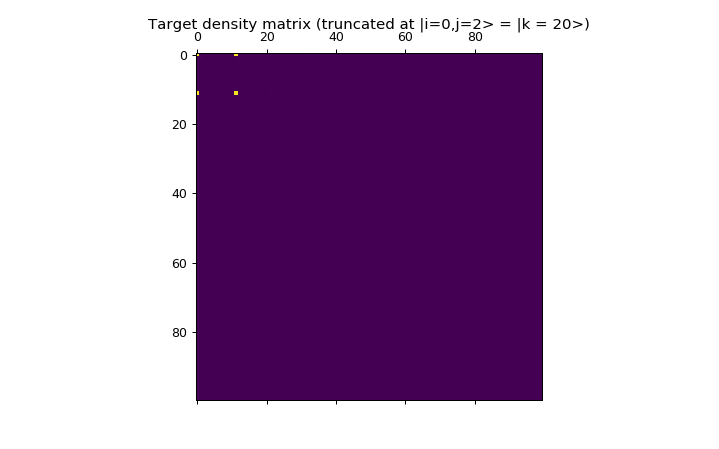

Text(0.5, 1.05, 'Target density matrix (truncated at |i=0,j=2> = |k = 20>)')

In [12]:
upper_cutoff = 100
lower_cutoff = 0
windowed_reconstructed_signal_state = state_vis.windowed_density_matrix(reconstructed_bell_state,
                                                                        lower_cutoff,
                                                                        upper_cutoff)
data_matrix = np.matrix(windowed_reconstructed_signal_state)
data_matrix = np.array(data_matrix, dtype=np.float64)
fig, ax = plt.subplots( figsize=(8,5) )
ax.matshow(data_matrix)
ax.set_title('Target density matrix (truncated at |i=0,j=2> = |k = 20>)')